In [30]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.ticker
from pylab import * 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import mplhep as hep
import requests
import math
import re
import csv

## 2HDM (type IV) limits from the low mass dark photon search

### Evaluation of sinTheta limits starting from the upper limit on the cross section * BR * acceptance

`Acceptance` evaluated generating gg $\to$ A events with Pythia (model: gg2A3 inclusive)

`Cross section` computed using HiGLU+HDECAY generators
`Branching ratios` (A $\to \mu\mu$) retrieved from here: ([link](https://github.com/cecilecaillol/CMS_HAA_SummaryPlots/blob/master/BR/BR_IV_0.5.dat))

In [31]:
# MODEL INDEPENDENT LIMITS on the cross section in pb for different mass points (GeV): 1,2,4,5,6,7,8. 
# Validation: mS = 20 GeV

#obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963 ]
obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963, 0.15 ]

v_obs_limit = []
v_exp_limit = []
v_mass = []
# Reference results: noPtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_expectedLimit_noPtMuMuCut_20220401.txt", delimiter = "\t")

# Updated Trigger Efficiency: observed and expected results WITH PtMuMu cut
#f_obs_limit = np.loadtxt("./limit_darkphoton_obs_CL90.txt")
#f_exp_limit = np.loadtxt("./limit_darkphoton_exp_CL90.txt")
#f_obs_limit = np.loadtxt("./limit_darkphoton_turbo_obs.txt")
#f_exp_limit = np.loadtxt("./limit_darkphoton_turbo_exp.txt")
#f_obs_limit = np.loadtxt("./limit_darkphoton_pythia_obs.txt")
#f_exp_limit = np.loadtxt("./limit_darkphoton_pythia_exp.txt")
#f_obs_limit = np.loadtxt("./limit_darkphoton_mad_obs.txt")
#f_exp_limit = np.loadtxt("./limit_darkphoton_mad_exp.txt")
f_obs_limit = np.loadtxt("./limit_darkphoton_fidturbo_obs.txt")
f_exp_limit = np.loadtxt("./limit_darkphoton_fidturbo_exp.txt")
# Updated Trigger Efficiency: observed and expected results WITHOUT PtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_obsLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")
#f_exp_limit = np.loadtxt("./CMS_modelIndependentLimits_expLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")

#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_obs_limit)):
    v_mass.append(f_obs_limit[i][0])
    v_obs_limit.append(round(f_obs_limit[i][1], 9))
    v_exp_limit.append(round(f_exp_limit[i][1], 9))
print("Model independent observed limits: \n", v_obs_limit)
print("##################################################")
print("Model independent expected limits: \n", v_exp_limit)

Model independent observed limits: 
 [1.21e-07, 7.1e-08, 7.8e-08, 1.48e-07, 1.72e-07, 1.55e-07, 1.44e-07, 1.24e-07, 1.62e-07, 1.61e-07, 7.5e-08, 7.7e-08, 7.8e-08, 7.8e-08, 1.07e-07, 1.19e-07, 8.2e-08, 1.99e-07, 3.34e-07, 3.53e-07, 2.53e-07, 2.07e-07, 1.82e-07, 1.6e-07, 7.3e-08, 7.6e-08, 1.02e-07, 1.03e-07, 1.61e-07, 2.69e-07, 5.41e-07, 2.87e-07, 1.7e-07, 1.11e-07, 1.06e-07, 1.08e-07, 9.8e-08, 1.13e-07, 3.39e-07, 4.06e-07, 2.74e-07, 1.64e-07, 1.31e-07, 1.7e-07, 2.49e-07, 3.02e-07, 4.87e-07, 4.78e-07, 2.19e-07, 1.19e-07, 1.98e-07, 3.1e-07, 1.94e-07, 1.69e-07, 4.06e-07, 3.44e-07, 2.14e-07, 1.41e-07, 9.9e-08, 1.46e-07, 2.68e-07, 3.64e-07, 4.15e-07, 2.12e-07, 1.75e-07, 1.71e-07, 2.26e-07, 2.84e-07, 3.68e-07, 2.09e-07, 1.94e-07, 2.4e-07, 3.19e-07, 3.85e-07, 3.14e-07, 1.79e-07, 1.95e-07, 4.4e-07, 5.87e-07, 5.69e-07, 9999.0, 9999.0, 4.47e-07, 2.7e-07, 3.35e-07, 5.42e-07, 6.84e-07, 7.46e-07, 6.07e-07, 5.02e-07, 4.01e-07, 3.89e-07, 4.19e-07, 7.14e-07, 9.63e-07, 7.74e-07, 3.99e-07, 4.14e-07, 5.4e

In [32]:
print("mass: ", len(v_mass))
print("obs lim: ", len(v_obs_limit))
print("exp lim: ", len(v_exp_limit))

mass:  146
obs lim:  146
exp lim:  146


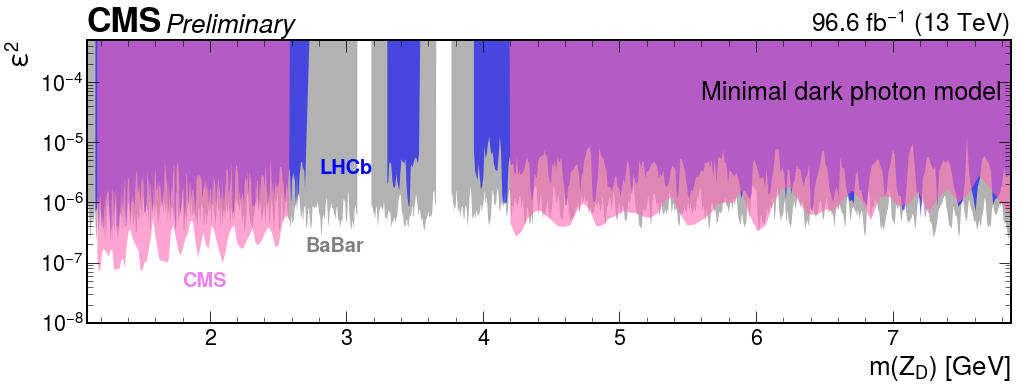

In [33]:
f_LHCb = np.loadtxt("./limit_darkphoton_lhcb_90CL_new.txt")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]) #Conversion from Mev to GeV
    v_lim_LHCb.append(f_LHCb[i][1]*f_LHCb[i][1])
    
f_BaBar = np.loadtxt("./limit_darkphoton_babar.txt")
v_lim_BaBar = []
v_mass_BaBar = []
for i in range(len(f_BaBar)):
    v_mass_BaBar.append(f_BaBar[i][0])
    v_lim_BaBar.append(f_BaBar[i][1]*f_BaBar[i][1])
#print("Model independent expected limits: \n", v_lim_BaBar)
    
p_cms_obs, p_lhcb = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 19})
#range = np.array([2.696,3.303])

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, lumi=96.6)

p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="grey", linewidth=0)
p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="grey", linewidth=0, alpha=0.6)

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.6)
p_lhcb = plt.semilogy()
p_cms_obs = plt.plot(v_mass, v_obs_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, v_obs_limit, 1, color="hotpink", linewidth=0, alpha=0.6)

plt.xlim(1.1,7.864)
plt.ylim(1e-8, 5e-4)
#p_lhcb.set_yticks([1e-1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7,1e-8])
#p_cms_obs.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('m($Z_{D}$) [GeV]')
plt.ylabel('$\\epsilon^2$')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")
p_babar = plt.text(2.7, 1.5e-7, "BaBar", fontsize=20, color="grey", fontweight='bold')
p_cms_obs = plt.text(1.8, 4e-8, "CMS", fontsize=20, color="violet", fontweight='bold')
p_lhcb = plt.text(2.8, 3e-6, "LHCb", fontsize=20, color="blue", fontweight='bold')

plt.text(5.6, 5e-5, "Minimal dark photon model", fontsize=25, color="black")
#plt.text(5.6, 0.009, "2HDM+S (type IV), tan$\\beta$=0.5", fontsize=16, verticalalignment='top')
#plt.show()
plt.tight_layout()
plt.savefig('limit_darkphoton_OBS_fidturbo.pdf', dpi=1200)
plt.savefig('limit_darkphoton_OBS_fidturbo.png', dpi=1200)

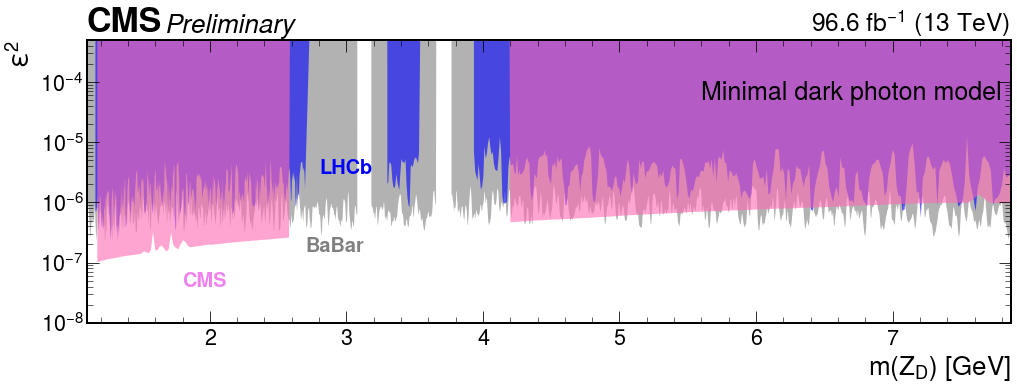

In [34]:

p_cms_obs, p_lhcb = plt.subplots(figsize=(15, 6))
plt.rcParams.update({'font.size': 19})
#range = np.array([2.696,3.303])

plt.style.use(hep.style.ROOT)
hep.cms.label("Preliminary", data=True, lumi=96.6)

p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="grey", linewidth=0)
p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="grey", linewidth=0, alpha=0.6)

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.6)
p_lhcb = plt.semilogy()
p_cms_exp = plt.plot(v_mass, v_exp_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, v_exp_limit, 1, color="hotpink", linewidth=0, alpha=0.6)

plt.xlim(1.1,7.864)
plt.ylim(1e-8, 5e-4)
#p_lhcb.set_yticks([1e-1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7,1e-8])
#p_cms_obs.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('m($Z_{D}$) [GeV]')
plt.ylabel('$\\epsilon^2$')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")

p_babar = plt.text(2.7, 1.5e-7, "BaBar", fontsize=20, color="grey", fontweight='bold')
p_cms_obs = plt.text(1.8, 4e-8, "CMS", fontsize=20, color="violet", fontweight='bold')
p_lhcb = plt.text(2.8, 3e-6, "LHCb", fontsize=20, color="blue", fontweight='bold')

plt.text(5.6, 5e-5, "Minimal dark photon model", fontsize=25, color="black")
#plt.text(5.6, 0.009, "2HDM+S (type IV), tan$\\beta$=0.5", fontsize=16, verticalalignment='top')
#plt.show()
plt.tight_layout()
plt.savefig('limit_darkphoton_EXP_fidturbo.pdf', dpi=1200)
plt.savefig('limit_darkphoton_EXP_fidturbo.png', dpi=1200)